In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
inputs = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
y = np.array([[1], [0], [0], [1]])

In [ ]:
class NeuralNet():
  def __init__(self, input_size, hidden_size, output_size):
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.output_size = output_size

    self.W1 = np.random.randn(self.input_size, self.hidden_size)
    self.W2 = np.random.randn(self.hidden_size, self.output_size)

  def forward(self, X):
    self.z1 = np.dot(X, self.W1)
    self.a1 = self.sigmoid(self.z1)
    self.z2 = np.dot(self.a1, self.W2)
    self.output = self.sigmoid(self.z2)
    return self.output

  def backprop(self, X, y, lr):
    output = self.forward(X)
    error_out = output - y
    delta_out = error_out * self.sigmoid_der(output)
    derivative_W2 = np.dot(self.a1.T, delta_out)
    error_hidden = np.dot(delta_out, self.W2.T)
    delta_hidden = error_hidden * self.sigmoid_der(self.a1)
    derivative_W1 = np.dot(inputs.T, delta_hidden)
    # gradient descent
    self.W2 -= derivative_W2 * lr
    self.W1 -= derivative_W1 * lr
    return self.mse(output, y)
    
  def sigmoid(self, x):
    return 1 / (1 + np.exp(-x))

  def sigmoid_der(self, x):
    return x * (1 - x)

  def mse(self, output, target):
    return np.mean((output - target) ** 2) / 2
  

1/2 (output - y) ^ 2 \\
1/2 (sigm(z2) - y) ^ 2 \\
1/2 (sigm(a1*W2) - y) ^ 2 \\
1/2 (sigm(sigm(z1)*W2) - y) ^ 2 \\
1/2 (sigm(sigm(inputs*W1)*W2) - y) ^ 2 \\
DERIVADA W2: \\
(output - y) * sigm'(z2)* a1 \\
DERIVADA W1: \\
(output - y) * sigm'(z2) * W2 * sigm'(z1) * inputs \\

Antes:
[[0.30907293]
 [0.32214283]
 [0.3379518 ]
 [0.35009691]]
Después:
[[0.96088106]
 [0.03970056]
 [0.0531158 ]
 [0.95467056]]


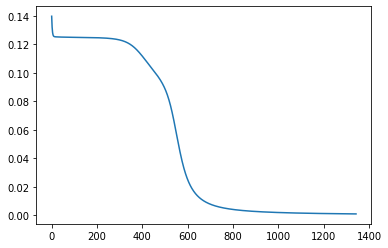

In [ ]:
nn = NeuralNet(3, 3, 1)
print("Antes:")
print(nn.forward(inputs))
errors = []
error = 1
while error > 0.001:
  error = nn.backprop(inputs, y, 1)
  errors.append(error)
print("Después:")
print(nn.forward(inputs))

x_axis = range(0, len(errors))
plt.plot(x_axis, errors)
plt.show()